<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/11.1%20-%20A%20transformada%20de%20Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .

# *Circuitos Elétricos I - Semana 11*

### A integral de Laplace

Seja $f(t)$ uma função definida no intervalo $0\leq t \leq \infty$, com $t$ e $f(t)$ reais, então a função $F(s)$, definida pela integral de Laplace

$$\large
\begin{equation}
F(s)=\mathcal{L}\{f(t)\}=\int_{0}^{\infty} f(t) e^{-s t} dt,\;\; s \in \mathbb{C},
\end{equation}
$$

é conhecida como a transformada de Laplace de $f(t)$.

#### A exponencial complexa

Temos que $s = \sigma + j\omega$, logo

$$ 
e^{-s t} = e^{-(\sigma + j\omega) t} = e^{-\sigma t}e^{-j\omega t} = e^{-\sigma t} [\cos(\omega t) + j\sin(\omega t)]
$$

$$ 
\begin{align}
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} f(t) e^{-\sigma t} [\cos(\omega t) + j\sin(\omega t)] dt\\
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} f(t) e^{-\sigma t} \cos(\omega t) dt + j\int_{0}^{\infty} f(t) e^{-\sigma t}\sin(\omega t) dt\\
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} \left[\frac{f(t)}{e^{\sigma t}}\right] \cos(\omega t) dt + j\int_{0}^{\infty} \left[\frac{f(t)}{e^{\sigma t}}\right]\sin(\omega t) dt
\end{align}
$$

**Teorema da existência:** se $f(t)$ é uma função contínua por pedaços para $t$ no intervalo $[a,\infty)$ e é exponencial de ordem $\sigma_0$, então a integral de Laplace converge para $\Re{(s)}>a$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from circuit.utils import round_expr, symdisp, symplot
from circuit.laplace import laplaceT as L
from circuit.laplace import invLaplaceT as invL

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

In [3]:
sp.init_printing()

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

#### Definindo algumas variáveis simbólicas de interesse

In [4]:
t     = sp.symbols('t', real=True)
s     = sp.symbols('s')
a     = sp.symbols('a', real=True, positive=True)
omega = sp.symbols('omega', real=True, positive=True)

## Transformada de Laplace no Sympy

In [5]:
help(sp.laplace_transform)

Help on function laplace_transform in module sympy.integrals.laplace:

laplace_transform(f, t, s, legacy_matrix=True, **hints)
    Compute the Laplace Transform `F(s)` of `f(t)`,
    
    .. math :: F(s) = \int_{0^{-}}^\infty e^{-st} f(t) \mathrm{d}t.
    
    Explanation
    
    For all sensible functions, this converges absolutely in a
    half-plane
    
    .. math :: a < \operatorname{Re}(s)
    
    This function returns ``(F, a, cond)`` where ``F`` is the Laplace
    transform of ``f``, `a` is the half-plane of convergence, and `cond` are
    auxiliary convergence conditions.
    
    The implementation is rule-based, and if you are interested in which
    rules are applied, and whether integration is attempted, you can switch
    debug information on by setting ``sympy.SYMPY_DEBUG=True``. The numbers
    of the rules in the debug information (and the code) refer to Bateman's
    Tables of Integral Transforms [1].
    
    The lower bound is `0-`, meaning that this bound should

## Função degrau unitário

#### Domínio do tempo

In [6]:
f = sp.Heaviside(t) # função degrau unitário

symdisp('f(t) =', f)

<IPython.core.display.Math object>

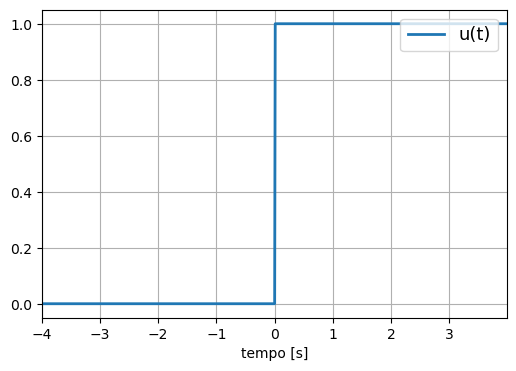

In [7]:
# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, f, intervalo, 'u(t)')

#### Domínio de Laplace

In [8]:
# calcula a transformada de Laplace de u(t)
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

In [9]:
f = sp.Heaviside(t-2) # função degrau unitário em t=2

symdisp('f(t) =', f)

<IPython.core.display.Math object>

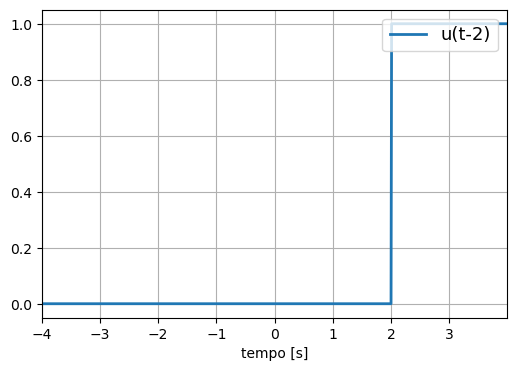

In [10]:
# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, f, intervalo, 'u(t-2)')

In [11]:
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

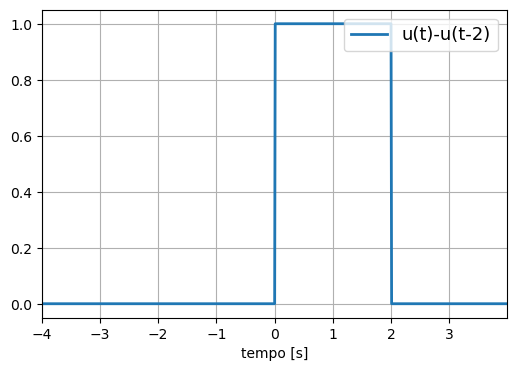

In [12]:
u1 = sp.Heaviside(t)   # função degrau unitário em t=0
u2 = sp.Heaviside(t-2) # função degrau unitário em t=2

# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, u1-u2, intervalo, 'u(t)-u(t-2)')

In [13]:
G = L(u1-u2,t,s)

symdisp('G(s) =', G)

<IPython.core.display.Math object>

## Função impulso unitário

#### Domínio do tempo

In [14]:
f = sp.DiracDelta(t)

symdisp('f(t) =', f)

<IPython.core.display.Math object>

#### Domínio de Laplace

In [15]:
# calcula a transformada de Laplace de δ(t)
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

## Função exponencial

#### Domínio do tempo

In [16]:
f = sp.exp(-a*t)

symdisp('f(t) =', f)

<IPython.core.display.Math object>

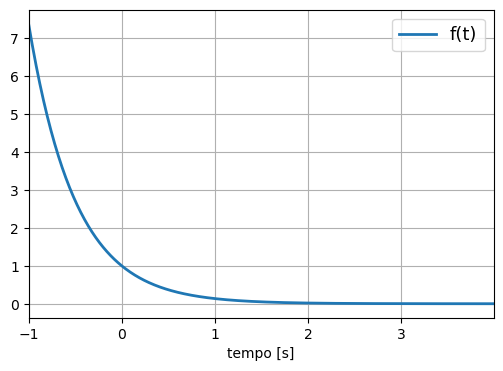

In [17]:
# plota função no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, f.subs({a:2}), intervalo, 'f(t)')

#### Domínio de Laplace

In [18]:
# calcula a transformada de Laplace de f(t)
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

## Função cosseno amortecido

#### Domínio do tempo

In [19]:
g = sp.exp(-a*t)*sp.cos(omega*t)

symdisp('g(t) =', g)

<IPython.core.display.Math object>

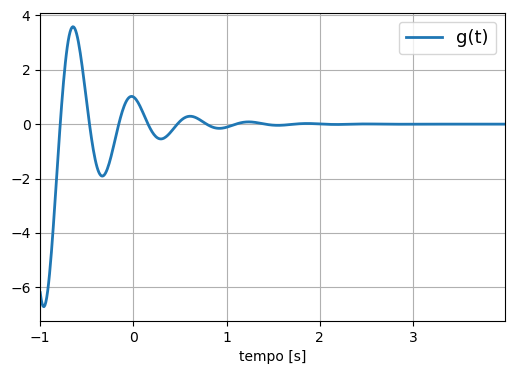

In [20]:
# plota função no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, g.subs({a:2, omega:10}), intervalo, 'g(t)')

In [21]:
G = L(g,t,s)

symdisp('G(s) =', G)

<IPython.core.display.Math object>

## Resposta subamortecida de um circuito de segunda ordem

#### Domínio do tempo

In [22]:
B1, B2 = sp.symbols('B1, B2', real=True)

h = sp.exp(-a*t)*(B1*sp.cos(omega*t) + B2*sp.sin(omega*t))

symdisp('h(t) =', h)

<IPython.core.display.Math object>

#### Domínio de Laplace

In [23]:
H = L(h,t,s)

symdisp('H(s) =', H.simplify())

<IPython.core.display.Math object>

In [24]:
h1 = invL(H,s,t)

symdisp('h_1(t) =', h1)

<IPython.core.display.Math object>

## Gere sua tabela de transformadas

In [25]:
func = [1,
         t,
         sp.exp(-a*t),
         t*sp.exp(-a*t),
         t**2*sp.exp(-a*t),
         sp.sin(omega*t),
         sp.cos(omega*t),
         1 - sp.exp(-a*t),
         sp.exp(-a*t)*sp.sin(omega*t),
         sp.exp(-a*t)*sp.cos(omega*t),
         ]
func

symdisp('f(t) =', func)

<IPython.core.display.Math object>

In [26]:
Fs = [L(f,t,s) for f in func]

symdisp('F(s) =', Fs)

<IPython.core.display.Math object>

## Proprieadades da transformada de Laplace

In [27]:
# from circuit.laplace import laplaceT

In [28]:
f = sp.Function('f', real=True)(t)
g = sp.Function('g', real=True)(t)

a, b = sp.symbols('a, b', real=True, positive=True)
n = sp.symbols('n', integer=True, positive=True)

### 1. Linearidade

In [29]:
H = L(a*f + b*g, t, s)

symdisp('\\mathcal{L}_t[af(t) + bg(t)](s) = ', H)

print('Exemplo:')
x = sp.exp(-10*t)

y = sp.exp(-2*t)

X = L(x,t,s)
Y = L(y,t,s)

symdisp('x(t) = ', x)
symdisp('y(t) = ', y)

symdisp('X(s) = ', X)
symdisp('Y(s) = ', Y)

symdisp('\\mathcal{L}_t[2x(t) + 3y(t)](s) = ', L(2*x + 3*y,t,s))

<IPython.core.display.Math object>

Exemplo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 2. Deslocamento (atraso) no tempo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Exemplo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

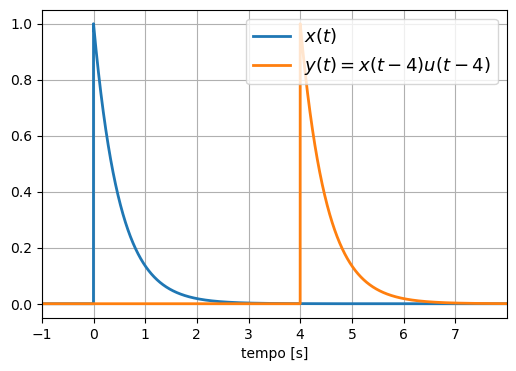

In [30]:
a = sp.symbols('a', real=True, positive=True)

H = L(f.subs({t:t-a})*sp.Heaviside(t-a),t,s)

symdisp('\\mathcal{L}_t\\left[f(t-a)\\right](s) = ', H)
symdisp('a>',0)

print('Exemplo:')
u = sp.Heaviside(t)
x = sp.exp(-2*t)*u

y = x.subs({t:t-4})

X = L(x,t,s)
Y = L(y,t,s)

symdisp('x(t) = ', x)
symdisp('y(t) = x(t-4) = ', y)

symdisp('X(s) = ', X)
symdisp('Y(s) = ', Y)

intervalo = np.arange(-1,8, 0.001)
symplot(t,[x, y], intervalo, ['$x(t)$','$y(t)=x(t-4)u(t-4)$'])

### 3. Amortecimento no tempo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Exemplo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

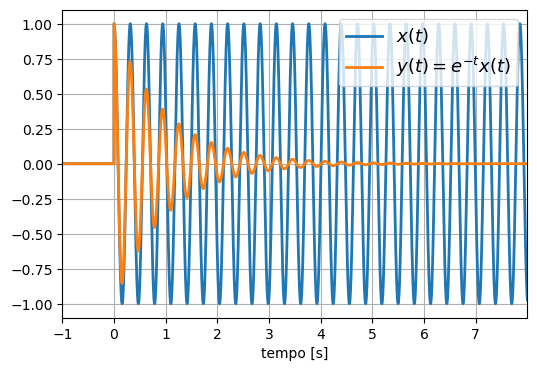

In [31]:
H = L(sp.exp(-a*t)*f,t,s)

symdisp('\\mathcal{L}_t\\left[e^{-at}f(t)\\right](s) = ', H)
symdisp('a >',0)

print('Exemplo:')
u = sp.Heaviside(t)
x = sp.cos(20*t)*u

y = sp.exp(-t)*x

X = L(x,t,s)
Y = L(y,t,s)

symdisp('x(t) = ', x)
symdisp('y(t) = e^{-2t}x(t) = ', y)

symdisp('X(s) = ', X.simplify())
symdisp('Y(s) = ', Y.simplify())

intervalo = np.arange(-1,8, 0.001)
symplot(t,[x, y], intervalo, ['$x(t)$','$y(t)=e^{-t}x(t)$'])

### 4. Derivada primeira no tempo

<IPython.core.display.Math object>

Exemplo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

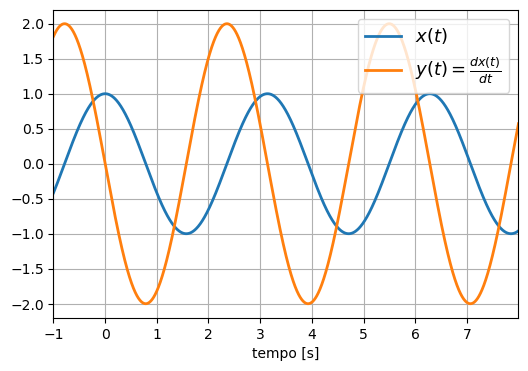

In [32]:
H = L(sp.diff(f,t,1),t,s)

symdisp('\\mathcal{L}_t\\left[\\frac{df(t)}{dt}\\right](s) = ', H)

print('Exemplo:')
u = sp.Heaviside(t)
x = sp.cos(2*t)

y = sp.diff(x,t)

X = L(x,t,s)
Y = L(y,t,s)

symdisp('x(t) = ', x)
symdisp('y(t) = \\frac{dx(t)}{dt} = ', y)

symdisp('X(s) = ', X.simplify())
symdisp('Y(s) = ', Y.simplify())

intervalo = np.arange(-1,8, 0.001)
symplot(t,[x, y], intervalo, ['$x(t)$','$y(t)=\\frac{dx(t)}{dt}$'])

### 5. Derivada segunda no tempo

<IPython.core.display.Math object>

Exemplo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

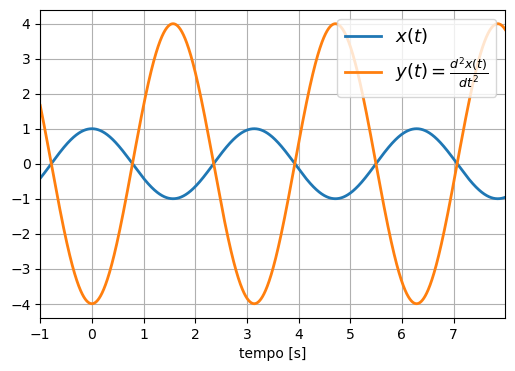

In [33]:
H = L(sp.diff(f,t,2),t,s)

symdisp('\\mathcal{L}_t\\left[\\frac{df^{2}(t)}{dt^{2}}\\right](s) = ', H)

print('Exemplo:')
u = sp.Heaviside(t)
x = sp.cos(2*t)

y = sp.diff(x,t,2)

X = L(x,t,s)
Y = L(y,t,s)

symdisp('x(t) = ', x)
symdisp('y(t) = \\frac{d^2x(t)}{dt^2} = ', y)

symdisp('X(s) = ', X.simplify())
symdisp('Y(s) = ', Y.simplify())

intervalo = np.arange(-1,8, 0.001)
symplot(t,[x, y], intervalo, ['$x(t)$','$y(t)=\\frac{d^2x(t)}{dt^2}$'])

### 6. Mudança de escala no tempo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Exemplo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

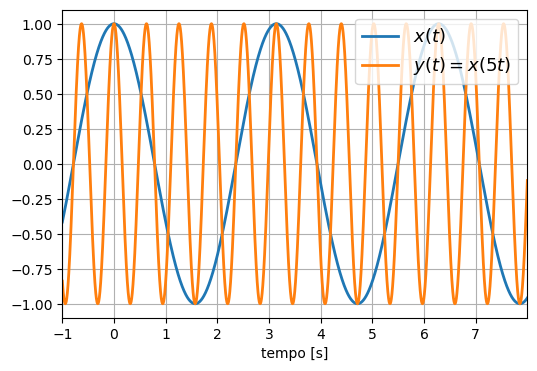

In [34]:
a = sp.symbols('a', real=True, positive=True)

H = L(f.subs({t:a*t}),t,s)

symdisp('\\mathcal{L}_t\\left[f(at)\\right](s) = ', H)
symdisp('a >',0)

print('Exemplo:')
u = sp.Heaviside(t)
x = sp.cos(2*t)

y = x.subs({t:5*t})

X = L(x,t,s)
Y = L(y,t,s)

symdisp('x(t) = ', x)
symdisp('y(t) = x(5t) = ', y)

symdisp('X(s) = ', X.simplify())
symdisp('Y(s) = ', Y.simplify())

intervalo = np.arange(-1,8, 0.001)
symplot(t,[x, y], intervalo, ['$x(t)$','$y(t)=x(5t)$'])

### Expansão em frações parciais

In [35]:
from circuit.laplace import partFrac

t = sp.symbols('t', real=True, positive=True)

In [39]:
F = (s+6)/(s*(s + 1)**2*(s + 3))

symdisp('F(s) = ', F)

symdisp('F(s) = ', round_expr(partFrac(F), 2))

f = invL(F, s, t, partialFractions = False).simplify()

symdisp('f(t) = ', round_expr(f,2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
F = 10*(s+5)/((s+5)**2 + 100)

symdisp('F(s) = ', F)

symdisp('F(s) = ', round_expr(partFrac(F), 2))

f = invL(F, s, t, partialFractions = True).simplify()

symdisp('f(t) = ', round_expr(f,2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>